### Different example uses for ColorCube

In [1]:
import os, sys, copy
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState

In [59]:
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.ImgUtils import (filter_pixels_circle
                              ,crop_img
                             )

In [340]:
from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot
                                    )
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

from modules.AnalysisHelpers import (threshToEdges
                                     ,pointsToList
                                    )

from modules.AnalysisHelpers import PixelConfusionMatrix

##### Load Book Data

In [5]:
DATA_DIR = "../data/misc/books/cc-gallery-2/"

In [6]:
gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))
all_data = gsDb.selectAll()
listGS = [ pickle.loads(d[1]) for d in all_data]
                
[_gs.frameCounter for _gs in listGS]

[0, 0, 0, 0, 189, 256]

In [35]:
for _gs in listGS:
    _gs.initDisplay()
    cvtPlot(_gs.getZoomWindow())
    plt.show()

##### Build thresh region volume

In [31]:
tracker = TrackFactory()
tracker.setInit(ballColor="green")

threshLo = tracker.getTrackParams()['thresh_lo']
threshHi = tracker.getTrackParams()['thresh_hi']

print threshLo, threshHi

(29, 86, 6) (64, 255, 255)


In [ ]:
plotEdges = pointsToList(threshToEdges(threshLo, threshHi, stepAmt = 10))

In [32]:
img = listGS[0].getZoomWindow()
colorData = imgToColors(img, sampleN = 1000)
listB, listG, listR = colorData

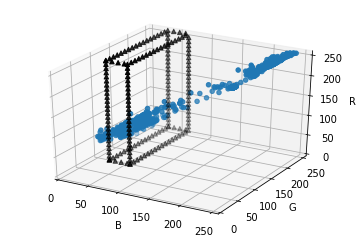

In [34]:
#subprocColorCube(listB, listG, listR, regionMarkers = plotEdges)
colorCube(listB, listG, listR, regionMarkers = plotEdges)

### Confusion Matrix Colorcoded

In [327]:
from modules.AnalysisHelpers import PixelConfusionMatrix

In [328]:
pcm = PixelConfusionMatrix()

In [329]:
pcm.setImg(listGS[0].getOrigFrame())

In [330]:
thresh = (
             tracker.getTrackParams()['thresh_lo']
            ,tracker.getTrackParams()['thresh_hi']
        )
pcm.setThresh(thresh)

In [331]:
pcm.setCircle(listGS[3].displayOutputScore['0']['data'])

In [332]:
pcm.calc()

In [402]:
640*480

307200

In [333]:
pcm.getVals()

{'f': 305683,
 'fn': 855,
 'fp': 27,
 'n': 306511,
 'p': 689,
 't': 1517,
 'tn': 305656,
 'tp': 662}

In [378]:
cm = pcm.getData()

In [379]:
metrics = ['tp', 'fp', 'fn', 'tn']
N = 1000

plotData = {}
for metric in metrics:
    _data = cm[metric]
    plotData[metric] = pointsToList(
                        random.sample(_data, min(len(_data), N))
                         )

In [400]:
def confusionPlotByImage(listGS, inputThresh, N = 1000):
    
    for _gs in listGS:
        
        _img = _gs.getOrigFrame()
        _circle = _gs.displayOutputScore['0']['data']
        _thresh = inputThresh
        
        pcm = PixelConfusionMatrix( img = _img
                                   ,thresh = _thresh
                                   ,circle = _circle
                                  )
        pcm.calc()
        
        cm = pcm.getData()
        
        metrics = ['tp', 'fp', 'fn', 'tn']
        plotData = {}
        
        for metric in metrics:
            _data = cm[metric]
            plotData[metric] = pointsToList(
                            random.sample(_data, min(len(_data), N))
                             )
        
        colorCube(confData = plotData)
        
        
#         plt.show()

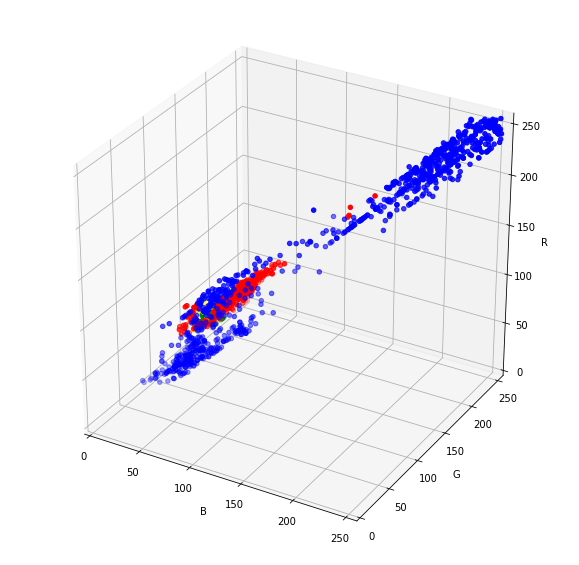

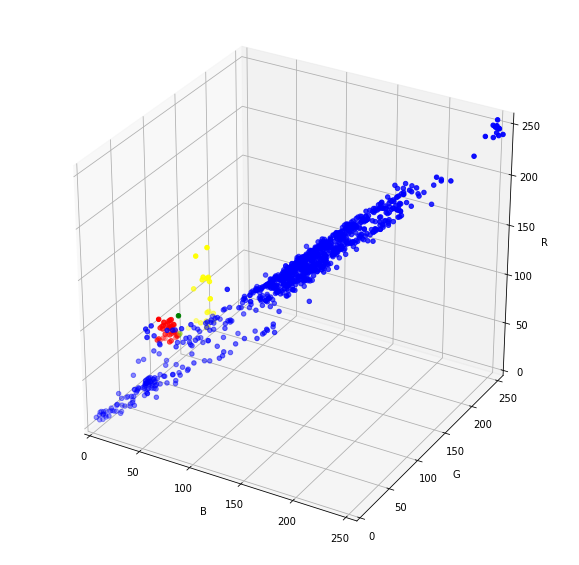

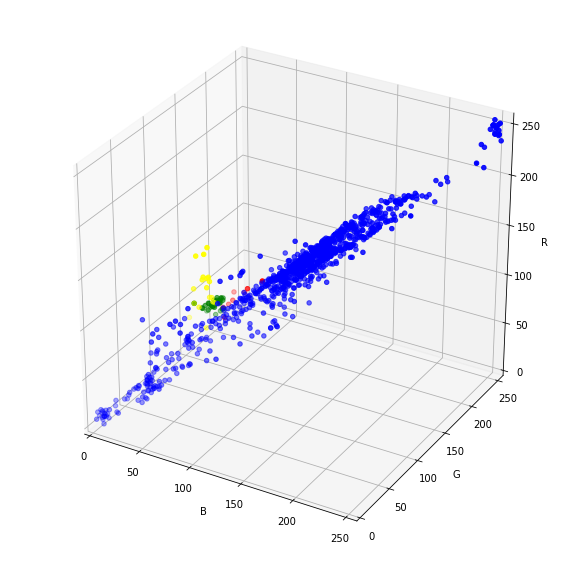

In [401]:
confusionPlotByImage(listGS[3:], thresh)

In [296]:
[ x.displayOutputScore for x in listGS]

[None,
 None,
 None,
 {'0': {'data': (203, 161, 47, 44), 'type': 'circle'}},
 {'0': {'data': (289, 421, 9, 10), 'type': 'circle'}},
 {'0': {'data': (320, 223, 10, 9), 'type': 'circle'}}]

In [391]:
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

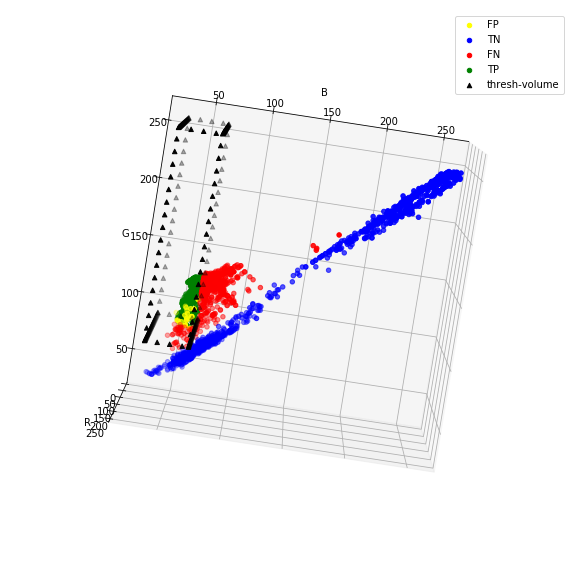

In [386]:
colorCube( confData = plotData
          ,regionMarkers = plotEdges 
          ,viewPositionDefined = {'azimuth': -81,'elevation': 95}
          ,bInitPosition=True
          ,spaceTotal=False
          ,bLegend = True)


In [392]:
subprocColorCube( confData = plotData
          ,regionMarkers = plotEdges 
#           ,viewPositionDefined = {'azimuth': -81,'elevation': 95}
#           ,bInitPosition=True
          ,spaceTotal=False
#           ,bLegend = True
        )

In [ ]:
#good head on view: 138.8 , 47.03
#good red+green: -166. , -3.57
#good green+blue {'azimuth': -81,'elevation': 95}
#good red+blue:  80.74 , 145.7
